# Radix sorts

This file demonstrates data on the performance of radix LSD and MSD sorting algorithms.

## Testing methods

- Each algorithm was tested on random data with sample size ranging from $10^5$ to $10^7$ with step size of $10^5$.
- Each test was performed 5 times and the average time was taken as a result.
- Seed for random number generator was created once and reused for each algorithm, which guarantees that the same array was generated for each algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("results/radix_sorts.csv")
df = df.pivot(index="Sample Size", columns="Algorithm", values="Elapsed Time (ms)")
print(df.head(3))

Algorithm    RadixLSD  RadixMSD
Sample Size                    
100000              0         6
200000              1         8
300000              2         9


## Two sorts comparison

Here are the plots (in linear and logarithmic scale) of the recorded performance of both sorting algorithms.

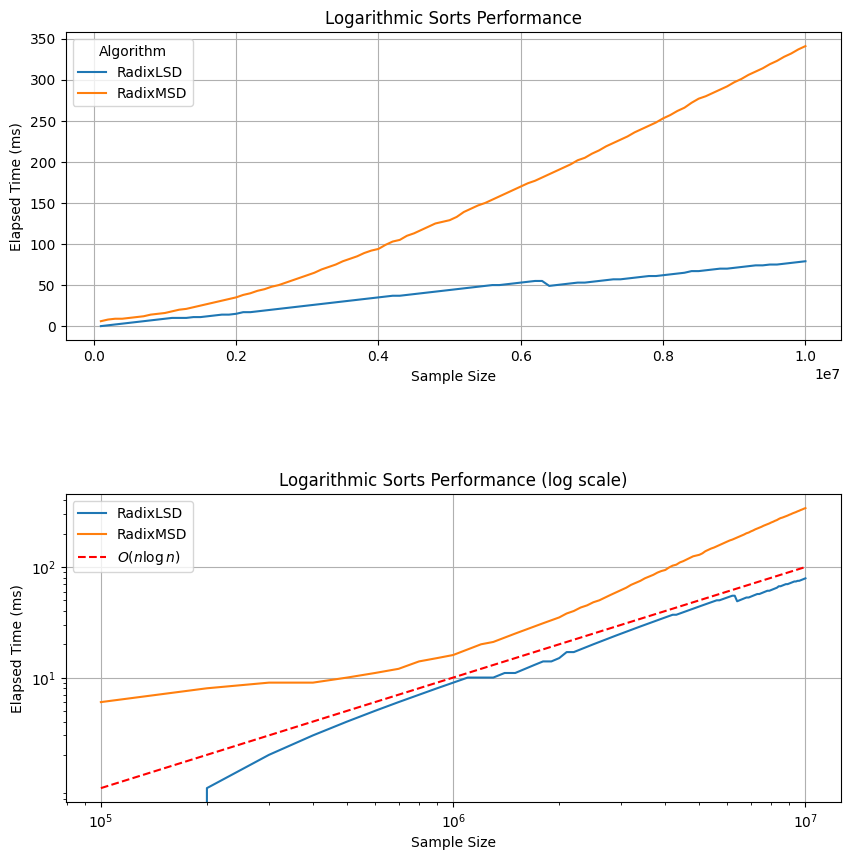

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
linear_scale, log_scale = axes
figure.subplots_adjust(hspace=0.5)
df.plot(
        ax=linear_scale,
        ylabel="Elapsed Time (ms)",
        title="Logarithmic Sorts Performance",
        grid=True)
df[df.values > 0].plot(
        ax=log_scale,
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Logarithmic Sorts Performance (log scale)",
        legend=False,
        yticks=np.logspace(1, 3, 3, base=10),
        grid=True)
x = np.logspace(5, 7, 50, base=10)
x_scale = 10**-5
log_scale.plot(x, (x*x_scale), '--r', label='$O(n\log n)$')
log_scale.legend()

Due to the extremely small time it takes for sorts to finish, the time measurements seem to be imprecise, which leads to noticeable jaggedness of plots.

Furthermore, either because of the imprecision of the time measurements or because of the recursive nature of the implementation of the Radix MSD sort algorithm, its performance plot does not seem to match the expected linear trend. However, Radix LSD sort algorithm's performance does seem to follow the expected linear trend, as both algorithms have the predicted time complexity of $O(n)$.

Due to the seemingly inconsistent performance of MSD sorting algorithm, it is difficult to say how much slower it is. However, both linear and logarithmic scale plots indicate that it is considerably slower than LSD radix sort algorithm.

## Conclusions

Radix MSD and LSD sorts perform much faster than the logarithmic sorts, because they do not use comparisons between elements and are not therefore constrained by the lower bound of $\Omega(n \log n)$. However, they are not applicable in the cases, where elements are not composed of digits. For example, you cannot use the MSD and LSD sorting algorithms to sort an array of vectors in 2D space based on their polar angle or length. This is compensated somewhat by the fact, that MSD and LSD radix sorts can be applied to sorting arrays of nonnegative floating-point integers, thanks to the IEEE 754 floating-point standard.

When MSD radix sort seems to perform slower than its LSD counterpart, due to its recursive implementation. Nonetheless, one could argue that the MSD radix sort is more efficient in sorting arrays of NUL-terminated strings, since it considers characters of the string left-to-right, which helps to avoid the overhead of `strlen()` calls.